In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install pyshp

     -------------------------------------- 44.5/44.5 KB 219.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install seaborn

     ------------------------------------ 292.8/292.8 KB 547.6 kB/s eta 0:00:00
     -------------------------------------- 37.0/37.0 MB 626.3 kB/s eta 0:00:00



In [37]:
pip install pyproj

Note: you may need to restart the kernel to use updated packages.
  Using cached pyproj-3.3.0-cp310-cp310-win_amd64.whl (6.3 MB)
     ------------------------------------ 149.2/149.2 KB 492.7 kB/s eta 0:00:00


In [38]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install rtree

     -------------------------------------- 44.9/44.9 KB 220.6 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for rtree: filename=Rtree-0.9.7-cp310-cp310-win_amd64.whl size=22591 sha256=330b20d25ebbdb8ecf9a988303e58e14b3bfae130a058eb414dcc44980eed24a
  Stored in directory: c:\users\nayan\appdata\local\pip\cache\wheels\73\d6\f9\0d2ccc59a164e651f30351d842e818cce42681734499d6ce25
Successfully built rtree
Note: you may need to restart the kernel to use updated packages.


In [2]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [67]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                                  user = "postgres",
                                                  password = "sultanmahmud22",
                                                  host = "127.0.0.1",
                                                  port= "5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection

In [68]:
con = PostgresConnection().getConnection()

Successfully connected to the database


In [4]:
# SELECT t.item_key
#      , t.time_key
#      , t.customer_key
#      , SUM(t.total_price)
# FROM ecomdb_star_schema.fact_table t
# GROUP BY CUBE(t.item_key, t.time_key, t.customer_key)

In [5]:
cur = con.cursor()
select_stmt = "SELECT t.item_key , t.time_key , t.coustomer_key , SUM(t.total_price) " \
    "FROM star_schema.fact_table t " \
    "GROUP BY CUBE(t.item_key, t.time_key, t.coustomer_key) "
cur.execute(select_stmt)
records = cur.fetchall()
records

[('I00001', 'T00018', 'C001954', Decimal('69.0')),
 ('I00001', 'T00018', None, Decimal('69.0')),
 ('I00001', 'T00140', 'C002860', Decimal('34.5')),
 ('I00001', 'T00140', None, Decimal('34.5')),
 ('I00001', 'T00186', 'C002321', Decimal('103.5')),
 ('I00001', 'T00186', 'C003833', Decimal('126.5')),
 ('I00001', 'T00186', None, Decimal('230.0')),
 ('I00001', 'T00199', 'C001601', Decimal('34.5')),
 ('I00001', 'T00199', None, Decimal('34.5')),
 ('I00001', 'T00212', 'C001047', Decimal('69.0')),
 ('I00001', 'T00212', None, Decimal('69.0')),
 ('I00001', 'T00227', 'C001059', Decimal('69.0')),
 ('I00001', 'T00227', None, Decimal('69.0')),
 ('I00001', 'T00228', 'C000676', Decimal('103.5')),
 ('I00001', 'T00228', None, Decimal('103.5')),
 ('I00001', 'T00248', 'C005818', Decimal('126.5')),
 ('I00001', 'T00248', None, Decimal('126.5')),
 ('I00001', 'T00269', 'C009102', Decimal('80.5')),
 ('I00001', 'T00269', None, Decimal('80.5')),
 ('I00001', 'T00272', 'C000308', Decimal('46.0')),
 ('I00001', 'T0027

In [6]:
df = pd.DataFrame(list(records), columns = ['Item_key','Time_key','Customer_key', 'Sales'])

In [7]:
df

,Item_key,Time_key,Customer_key,Sales
0,I00001,T00018,C001954,69.0
1,I00001,T00018,None,69.0
2,I00001,T00140,C002860,34.5
3,I00001,T00140,None,34.5
4,I00001,T00186,C002321,103.5
...,...,...,...,...
3909412,I00255,None,C009191,100.0
3909413,I00256,None,C009191,160.0
3909414,I00257,None,C009191,210.0
3909415,I00261,None,C009191,231.0


In [6]:
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"WHERE tim.month = 12 " \
"GROUP BY s.division "\
"ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()
records

[('BARISAL', Decimal('638101.00')),
 ('CHITTAGONG', Decimal('1665138.00')),
 ('DHAKA', Decimal('3440676.25')),
 ('KHULNA', Decimal('952049.75')),
 ('RAJSHAHI', Decimal('1041201.25')),
 ('RANGPUR', Decimal('721057.50')),
 ('SYLHET', Decimal('465256.75'))]

In [7]:
df = pd.DataFrame(list(records), columns = ['Division', 'Sales'])

In [8]:
df

,Division,Sales
0,BARISAL,638101.00
1,CHITTAGONG,1665138.00
2,DHAKA,3440676.25
3,KHULNA,952049.75
4,RAJSHAHI,1041201.25
5,RANGPUR,721057.50
6,SYLHET,465256.75


In [10]:
df.dtypes

Division    object
Sales       object
dtype: object

In [13]:
df['Sales'] = df['Sales'].astype('float64')

In [14]:
df.dtypes

Division     object
Sales       float64
dtype: object

In [15]:
x = df.Division
y = df.Sales

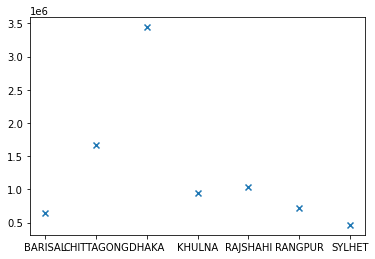

In [22]:
plt.scatter(x, y, marker = 'x')

In [17]:
plt.show()

In [20]:
df = df.set_index(['Division'])

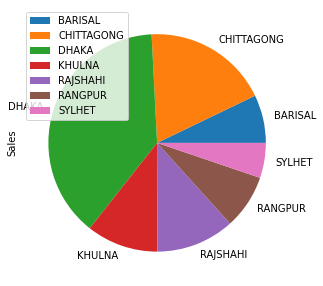

In [21]:
plot = df.plot.pie(y='Sales', figsize=(5, 5))

In [57]:

# CREATE TABLE star_schema.Fact_table
# (
#  coustomer_key varchar(10) NOT NULL,
#  payment_key   varchar(10) NOT NULL,
#  item_key      varchar(10) NOT NULL,
#  time_key      varchar(10) NOT NULL,
#  store_key     varchar(10) NOT NULL,
#  quantity      numeric NOT NULL,
#  unit          text NOT NULL,
#  unit_price    numeric NOT NULL,
#  total_price   numeric NOT NULL,
#  CONSTRAINT FK_40 FOREIGN KEY ( coustomer_key ) REFERENCES star_schema.Coustomer_dim ( coustomer_key ),
#  CONSTRAINT FK_43 FOREIGN KEY ( store_key ) REFERENCES star_schema.Store_dim ( store_key ),
#  CONSTRAINT FK_46 FOREIGN KEY ( time_key ) REFERENCES star_schema.Time_dim ( time_key ),
#  CONSTRAINT FK_49 FOREIGN KEY ( item_key ) REFERENCES star_schema.Item_dim ( item_key ),
#  CONSTRAINT FK_52 FOREIGN KEY ( payment_key ) REFERENCES star_schema.Trans_dim ( payment_key )
# );

# CREATE INDEX FK_42 ON star_schema.Fact_table
# (
#  coustomer_key
# );

# CREATE INDEX FK_45 ON star_schema.Fact_table
# (
#  store_key
# );

# CREATE INDEX FK_48 ON star_schema.Fact_table
# (
#  time_key
# );

# CREATE INDEX FK_51 ON star_schema.Fact_table
# (
#  item_key
# );

# CREATE INDEX FK_54 ON star_schema.Fact_table
# (
#  payment_key
# );





In [ ]:
# SELECT t.item_key
#      , t.store_key
#      , SUM(t.total_price)
# FROM star_schema.fact_table t
# GROUP BY CUBE(t.item_key, t.store_key)

In [44]:
cur = con.cursor()
select_stmt = "SELECT t.item_key , t.store_key, SUM(t.total_price) " \
"FROM star_schema.fact_table t " \
"GROUP BY CUBE(t.item_key, t.store_key) "
cur.execute(select_stmt)
records = cur.fetchall()
records

[('I00001', 'S0001', Decimal('690.0')),
 ('I00001', 'S0002', Decimal('517.5')),
 ('I00001', 'S0003', Decimal('345.0')),
 ('I00001', 'S0004', Decimal('678.5')),
 ('I00001', 'S0005', Decimal('391.0')),
 ('I00001', 'S0006', Decimal('264.5')),
 ('I00001', 'S0007', Decimal('460.0')),
 ('I00001', 'S0008', Decimal('184.0')),
 ('I00001', 'S0009', Decimal('368.0')),
 ('I00001', 'S0010', Decimal('598.0')),
 ('I00001', 'S00100', Decimal('184.0')),
 ('I00001', 'S00101', Decimal('379.5')),
 ('I00001', 'S00102', Decimal('632.5')),
 ('I00001', 'S00103', Decimal('379.5')),
 ('I00001', 'S00104', Decimal('356.5')),
 ('I00001', 'S00105', Decimal('299.0')),
 ('I00001', 'S00106', Decimal('253.0')),
 ('I00001', 'S00107', Decimal('264.5')),
 ('I00001', 'S00108', Decimal('368.0')),
 ('I00001', 'S00109', Decimal('540.5')),
 ('I00001', 'S0011', Decimal('552.0')),
 ('I00001', 'S00110', Decimal('287.5')),
 ('I00001', 'S00111', Decimal('471.5')),
 ('I00001', 'S00112', Decimal('184.0')),
 ('I00001', 'S00113', Decim

In [45]:
df = pd.DataFrame(list(records), columns = ['Item_key', 'Store_key', 'Sales'])

In [46]:
df

,Item_key,Store_key,Sales
0,I00001,S0001,690.0
1,I00001,S0002,517.5
2,I00001,S0003,345.0
3,I00001,S0004,678.5
4,I00001,S0005,391.0
...,...,...,...
191689,None,S0023,140844.25
191690,None,S00267,143393.00
191691,None,S00666,145134.50
191692,None,S00635,149283.25


In [ ]:
# SELECT s.division
#      , t.store_key
#      , SUM(t.total_price)
# FROM star_schema.fact_table t
# JOIN star_schema.store_dim s ON s.store_key = t.store_key
# GROUP BY CUBE(s.division, t.store_key)

In [51]:

cur = con.cursor()
select_stmt = "SELECT s.division, t.store_key, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"GROUP BY CUBE(s.division, t.store_key) "
cur.execute(select_stmt)
records = cur.fetchall()
records

[(None, None, Decimal('105401435.75')),
 ('DHAKA', 'S00290', Decimal('141068.00')),
 ('CHITTAGONG', 'S00698', Decimal('149637.75')),
 ('RAJSHAHI', 'S00166', Decimal('147450.00')),
 ('DHAKA', 'S00646', Decimal('152306.00')),
 ('CHITTAGONG', 'S00485', Decimal('145134.25')),
 ('DHAKA', 'S00373', Decimal('138332.00')),
 ('CHITTAGONG', 'S00706', Decimal('141507.50')),
 ('CHITTAGONG', 'S00467', Decimal('143563.25')),
 ('DHAKA', 'S00623', Decimal('155576.00')),
 ('DHAKA', 'S00601', Decimal('158027.50')),
 ('CHITTAGONG', 'S00469', Decimal('151968.00')),
 ('DHAKA', 'S00303', Decimal('144928.25')),
 ('CHITTAGONG', 'S00701', Decimal('149358.75')),
 ('BARISAL', 'S00719', Decimal('144957.00')),
 ('RAJSHAHI', 'S00119', Decimal('139903.50')),
 ('DHAKA', 'S00321', Decimal('147571.75')),
 ('DHAKA', 'S00276', Decimal('147569.50')),
 ('KHULNA', 'S00186', Decimal('142134.00')),
 ('CHITTAGONG', 'S00708', Decimal('156793.75')),
 ('RAJSHAHI', 'S00165', Decimal('145140.25')),
 ('SYLHET', 'S0032', Decimal('139

In [52]:
df = pd.DataFrame(list(records), columns = ['Division', 'Store_key', 'Sales'])

In [53]:
df

,Division,Store_key,Sales
0,None,None,105401435.75
1,DHAKA,S00290,141068.00
2,CHITTAGONG,S00698,149637.75
3,RAJSHAHI,S00166,147450.00
4,DHAKA,S00646,152306.00
...,...,...,...
1455,None,S0023,140844.25
1456,None,S00267,143393.00
1457,None,S00666,145134.50
1458,None,S00597,148542.75


In [ ]:
SELECT s.division
     , tim.month
     , SUM(t.total_price)
FROM star_schema.fact_table t
JOIN star_schema.store_dim s ON s.store_key = t.store_key
JOIN star_schema.time_dim tim ON tim.time_key = t.time_key
GROUP BY CUBE(s.division, tim.month)
ORDER BY tim.month

In [58]:

cur = con.cursor()
select_stmt = "SELECT s.division, tim.month, SUM(t.total_price) "\
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"GROUP BY CUBE(s.division, tim.month)"\
"ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()
records

[('BARISAL', 1, Decimal('643505.00')),
 ('BARISAL', 3, Decimal('637664.75')),
 ('BARISAL', 12, Decimal('638101.00')),
 ('BARISAL', 7, Decimal('655357.75')),
 ('BARISAL', 4, Decimal('612193.00')),
 ('BARISAL', None, Decimal('7520343.75')),
 ('BARISAL', 2, Decimal('582863.00')),
 ('BARISAL', 10, Decimal('620955.00')),
 ('BARISAL', 11, Decimal('626030.50')),
 ('BARISAL', 6, Decimal('611915.50')),
 ('BARISAL', 9, Decimal('619753.75')),
 ('BARISAL', 8, Decimal('631881.50')),
 ('BARISAL', 5, Decimal('640123.00')),
 ('CHITTAGONG', 5, Decimal('1721925.50')),
 ('CHITTAGONG', 12, Decimal('1665138.00')),
 ('CHITTAGONG', 6, Decimal('1589532.50')),
 ('CHITTAGONG', 8, Decimal('1667686.75')),
 ('CHITTAGONG', 11, Decimal('1640113.75')),
 ('CHITTAGONG', None, Decimal('19763595.00')),
 ('CHITTAGONG', 1, Decimal('1714833.25')),
 ('CHITTAGONG', 4, Decimal('1584083.00')),
 ('CHITTAGONG', 3, Decimal('1684031.00')),
 ('CHITTAGONG', 10, Decimal('1650355.25')),
 ('CHITTAGONG', 7, Decimal('1712954.25')),
 ('CHI

In [59]:
df = pd.DataFrame(list(records), columns = ['Division', 'Month', 'Sales'])

In [60]:
df

,Division,Month,Sales
0,BARISAL,1.0,643505.00
1,BARISAL,3.0,637664.75
2,BARISAL,12.0,638101.00
3,BARISAL,7.0,655357.75
4,BARISAL,4.0,612193.00
...,...,...,...
99,None,12.0,8923480.50
100,None,3.0,8939152.00
101,None,11.0,8680026.00
102,None,NaN,105401435.75


In [ ]:
SELECT s.division
     , tim.month
     , i.item_name
     , SUM(t.total_price)
FROM star_schema.fact_table t
JOIN star_schema.store_dim s ON s.store_key = t.store_key
JOIN star_schema.time_dim tim ON tim.time_key = t.time_key
JOIN star_schema.item_dim i ON i.item_key = t.item_key
GROUP BY CUBE(s.division, tim.month, i.item_name)
ORDER BY tim.month

In [69]:
cur = con.cursor()
select_stmt = "SELECT s.division , tim.month, i.item_name , SUM(t.total_price) "\
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.item_dim i on i.item_key = t.item_key " \
"GROUP BY CUBE(s.division, tim.month, i.item_name)"\
"ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()
records

[('BARISAL', 9, 'Waterloo Sparkling Watermelon 12oz', Decimal('1184.0')),
 ('BARISAL', 9, "Welch's 100% Juice Variety10 oz", Decimal('2159.0')),
 ('BARISAL', 9, 'Wint O Green LifeSavers Sugar Free', Decimal('2432.0')),
 ('BARISAL', 9, 'Wonderful Pistachios (in shell)', Decimal('3102.0')),
 ('BARISAL', 9, 'Yoplait Original Yogurt Variety Pack ', Decimal('1752.0')),
 ('BARISAL', 9, 'Zoo Animal Cookies/Crackers', Decimal('2408.0')),
 ('BARISAL', 9, None, Decimal('619753.75')),
 ('BARISAL', 10, '100% Juice Box Variety 6.75 oz ', Decimal('1035.0')),
 ('BARISAL', 10, 'A&W Root Beer - 12 oz cans', Decimal('1817.0')),
 ('BARISAL', 10, 'A&W Root Beer Diet - 12 oz cans', Decimal('783.00')),
 ('BARISAL', 10, 'Advil 2 pill packets', Decimal('1638.0')),
 ('BARISAL', 10, 'All Purpose Cleaner 409 Spray', Decimal('2394.0')),
 ('BARISAL', 10, 'Altoids Small Packs Variety', Decimal('1332.0')),
 ('BARISAL', 10, 'Apple Sauce Variety GoGO Squeeze 3.2oz', Decimal('1274.0')),
 ('BARISAL', 10, 'AquaFina Purif

In [70]:
df = pd.DataFrame(list(records), columns = ['Division', 'Month','Item Name', 'Sales'])

In [71]:
df

,Division,Month,Item Name,Sales
0,BARISAL,9.0,Waterloo Sparkling Watermelon 12oz,1184.0
1,BARISAL,9.0,Welch's 100% Juice Variety10 oz,2159.0
2,BARISAL,9.0,Wint O Green LifeSavers Sugar Free,2432.0
3,BARISAL,9.0,Wonderful Pistachios (in shell),3102.0
4,BARISAL,9.0,Yoplait Original Yogurt Variety Pack,1752.0
...,...,...,...,...
27035,None,9.0,Mountain Dew - 12 oz cans,32370.00
27036,None,5.0,Red Bull 12oz,107800.0
27037,None,10.0,Belvita Hard Biscuits Blueberry,24661.0
27038,None,NaN,Ginger Ale - 12 oz cans,156276.00


In [ ]:
SELECT s.division
     , s.district
     , tim.month
     , COUNT(*)
FROM star_schema.fact_table t
JOIN star_schema.store_dim s ON s.store_key = t.store_key
JOIN star_schema.time_dim tim ON tim.time_key = t.time_key
GROUP BY ROLLUP(s.division, tim.month, s.district)


In [73]:
cur = con.cursor()
select_stmt = "SELECT s.division, s.district, tim.month, SUM(t.total_price) "\
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"GROUP BY ROLLUP(s.division, tim.month, s.district)"
cur.execute(select_stmt)
records = cur.fetchall()
records

[(None, None, None, Decimal('105401435.75')),
 ('RAJSHAHI', 'CHAPAI NABABGANJ', 1, Decimal('60243.50')),
 ('BARISAL', 'BARGUNA', 12, Decimal('68845.50')),
 ('RANGPUR', 'GAIBANDHA', 10, Decimal('84232.50')),
 ('BARISAL', 'JHALOKATI', 1, Decimal('48384.50')),
 ('RANGPUR', 'KURIGRAM', 9, Decimal('113767.25')),
 ('BARISAL', 'BARGUNA', 5, Decimal('77050.50')),
 ('CHITTAGONG', 'KHAGRACHHARI', 2, Decimal('91557.00')),
 ('RAJSHAHI', 'SIRAJGANJ', 7, Decimal('113320.75')),
 ('DHAKA', 'SHARIATPUR', 3, Decimal('69586.00')),
 ('KHULNA', 'SATKHIRA', 10, Decimal('83639.50')),
 ('DHAKA', 'MYMENSINGH', 10, Decimal('169513.25')),
 ('CHITTAGONG', 'FENI', 8, Decimal('70866.25')),
 ('BARISAL', 'JHALOKATI', 9, Decimal('47955.00')),
 ('RAJSHAHI', 'RAJSHAHI', 4, Decimal('313511.25')),
 ('DHAKA', 'RAJBARI', 2, Decimal('58859.00')),
 ('DHAKA', 'NARSINGDI', 6, Decimal('66101.25')),
 ('RANGPUR', 'THAKURGAON', 2, Decimal('53765.75')),
 ('DHAKA', 'GOPALGANJ', 7, Decimal('60264.75')),
 ('BARISAL', 'BARISAL', 4, Deci

In [74]:
df = pd.DataFrame(list(records), columns = ['Division', 'Month','District', 'Sales'])

In [75]:
df

,Division,Month,District,Sales
0,None,None,NaN,105401435.75
1,RAJSHAHI,CHAPAI NABABGANJ,1.0,60243.50
2,BARISAL,BARGUNA,12.0,68845.50
3,RANGPUR,GAIBANDHA,10.0,84232.50
4,BARISAL,JHALOKATI,1.0,48384.50
...,...,...,...,...
855,CHITTAGONG,None,NaN,19763595.00
856,BARISAL,None,NaN,7520343.75
857,KHULNA,None,NaN,11311610.50
858,RANGPUR,None,NaN,8429836.50


In [76]:
cur = con.cursor()
select_stmt = "SELECT s.division, s.district, tim.month, COUNT(*) "\
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"GROUP BY ROLLUP(s.division, tim.month, s.district)"
cur.execute(select_stmt)
records = cur.fetchall()
records

[(None, None, None, 1000000),
 ('RAJSHAHI', 'CHAPAI NABABGANJ', 1, 576),
 ('BARISAL', 'BARGUNA', 12, 684),
 ('RANGPUR', 'GAIBANDHA', 10, 780),
 ('BARISAL', 'JHALOKATI', 1, 454),
 ('RANGPUR', 'KURIGRAM', 9, 1039),
 ('BARISAL', 'BARGUNA', 5, 737),
 ('CHITTAGONG', 'KHAGRACHHARI', 2, 835),
 ('RAJSHAHI', 'SIRAJGANJ', 7, 1091),
 ('DHAKA', 'SHARIATPUR', 3, 658),
 ('KHULNA', 'SATKHIRA', 10, 791),
 ('DHAKA', 'MYMENSINGH', 10, 1587),
 ('CHITTAGONG', 'FENI', 8, 670),
 ('BARISAL', 'JHALOKATI', 9, 480),
 ('RAJSHAHI', 'RAJSHAHI', 4, 2940),
 ('DHAKA', 'RAJBARI', 2, 548),
 ('DHAKA', 'NARSINGDI', 6, 642),
 ('RANGPUR', 'THAKURGAON', 2, 520),
 ('DHAKA', 'GOPALGANJ', 7, 587),
 ('BARISAL', 'BARISAL', 4, 2145),
 ('DHAKA', 'NARAYANGANJ', 11, 568),
 ('DHAKA', 'SHERPUR', 10, 534),
 ('RANGPUR', 'THAKURGAON', 10, 560),
 ('SYLHET', 'MAULVIBAZAR', 2, 729),
 ('DHAKA', 'NETRAKONA', 10, 1195),
 ('DHAKA', 'NETRAKONA', 11, 1146),
 ('DHAKA', 'SHARIATPUR', 1, 691),
 ('RANGPUR', 'PANCHAGARH', 10, 586),
 ('BARISAL', 'BARGU

In [77]:
df = pd.DataFrame(list(records), columns = ['Division', 'Month','District', 'No of Product'])

In [78]:
df

,Division,Month,District,No of Product
0,None,None,NaN,1000000
1,RAJSHAHI,CHAPAI NABABGANJ,1.0,576
2,BARISAL,BARGUNA,12.0,684
3,RANGPUR,GAIBANDHA,10.0,780
4,BARISAL,JHALOKATI,1.0,454
...,...,...,...,...
855,CHITTAGONG,None,NaN,187340
856,BARISAL,None,NaN,71444
857,KHULNA,None,NaN,107164
858,RANGPUR,None,NaN,79926


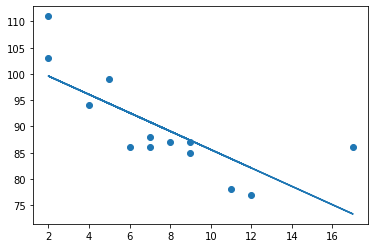

In [79]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
